In [26]:
pd.read_clipboard()

,animal_name,feathers,eggs,milk,aquatic,predator,toothed,backbone,breathes,fins,legs,tail
0,aardvark,0,0,1,0,1,1,1,1,0,4,0
1,antelope,0,0,1,0,0,1,1,1,0,4,1
2,bass,0,1,0,1,1,1,1,0,1,0,1
3,bear,0,0,1,0,1,1,1,1,0,4,0
4,boar,0,0,1,0,1,1,1,1,0,4,1
5,buffalo,0,0,1,0,0,1,1,1,0,4,1
6,calf,0,0,1,0,0,1,1,1,0,4,1
7,carp,0,1,0,1,0,1,1,0,1,0,1
8,catfish,0,1,0,1,1,1,1,0,1,0,1
9,cavy,0,0,1,0,0,1,1,1,0,4,0


## 동물 분류하기
- 다리가 몇개냐, 꼬리가 있냐, 날수 있냐, 알을 낳냐, 수영할수 있냐..

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler # 이상치가 있을 때 효과적

In [17]:
path = 'C:/Users/User/Desktop/딥러닝 프레임워크/DeepLearningZeroToAll-master/DeepLearningZeroToAll-master/data-04-zoo.csv'
df = pd.read_csv(path, header=None)
df.shape

(120, 17)

In [16]:
df0 =  df.iloc[19:] 
df0.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
19,1,0,0.0,1.0,0.0,0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0
20,1,0,0.0,1.0,0.0,0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0
21,0,0,1.0,0.0,0.0,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
22,1,0,0.0,1.0,0.0,0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0
23,1,0,0.0,1.0,0.0,0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0


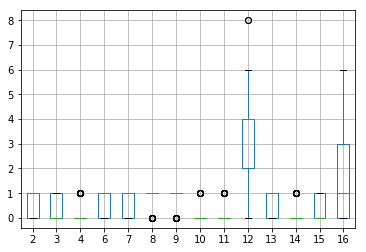

In [25]:
p = df0.boxplot()

In [ ]:
df0.sort_values(by=9, ascending=True)

In [20]:
df0[9].unique()

array([1., 0.])

In [19]:
df0[16].unique()

array([0., 3., 1., 6., 5., 4., 2.])

In [28]:
df0.isna().sum().sum() #누락확인

0

In [32]:
df0[0].unique(), df0[2].unique()

(array(['1', '0'], dtype=object), array([0., 1.]))

In [35]:
df0[0] = pd.to_numeric(df0[0])
df0[1] = pd.to_numeric(df0[1])
df0[5] = pd.to_numeric(df0[5])

In [42]:
#다리 갯수는 카테고리다 
df0[12] = df0[12].values.astype(np.int).astype(np.str)

In [46]:
df_hot = pd.get_dummies(df0)

In [50]:
df_hot.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,12_0,12_2,12_4,12_5,12_6,12_8
19,1,0,0.0,1.0,0.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0,0,1,0,0,0
20,1,0,0.0,1.0,0.0,0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0,0,1,0,0,0
21,0,0,1.0,0.0,0.0,1,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,3.0,1,0,0,0,0,0
22,1,0,0.0,1.0,0.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0,0,1,0,0,0
23,1,0,0.0,1.0,0.0,0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0,0,1,0,0,0


In [60]:
x = df_hot.drop(columns=16) # y 가 중간에 껴있을때 편합니다
y = df_hot[16]
x = np.array(x).astype(np.float32)
y = np.array(y).astype(np.int32)
x.shape, y.shape, x.dtype, y.dtype, y.min(), y.max()

((101, 21), (101,), dtype('float32'), dtype('int32'), 0, 6)

In [ ]:
scaler = StandardScaler().fit(x) # 표준 편차 정규화 
xn = scaler.transform(x)

#### sparse_softmax_cross_entropy_with_logits(Y, z) 함수
Y 를 원핫 인코딩 하고, z를 softmax를 취한 다음, 0이 나오지 않도록 최소값 설정한 후 크로스 엔트로피를 구함

In [ ]:
import tensorflow.contrib.slim as slim # contribution 기여한 함수들
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, 21])
Y = tf.placeholder(tf.int32, [None]) # sparse.. 을 사용하면 원핫 인코딩을 안해도 됩니다
z = slim.fully_connected(inputs=X, num_outputs=7) #matmul(X(M, 21), W(21, ?)) + b(?)
h = tf.nn.softmax(z) #log
cost = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y, logits=z)#logits 은 softmax 하기 전의 값
cost = tf.reduce_mean(cost)
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [86]:
tf.trainable_variables()

[<tf.Variable 'fully_connected/weights:0' shape=(21, 7) dtype=float32_ref>,
 <tf.Variable 'fully_connected/biases:0' shape=(7,) dtype=float32_ref>]

In [98]:
for i in range(1000): # 에포크
    _, _cost = sess.run([train, cost], {X:xn, Y:y})
p = np.argmax( sess.run(h, {X:xn} ) , axis=-1)
_cost, accuracy_score(y, p)

(0.112115376, 0.9504950495049505)

In [101]:
np.set_printoptions(3, suppress=True)
sess.run(z, {X:xn[:5]} )

array([[8.015, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [9.164, 0.   , 0.209, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 2.36 , 7.332, 0.   , 0.   , 1.226],
       [8.015, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [9.227, 0.   , 1.397, 0.   , 0.   , 0.   , 0.   ]], dtype=float32)

In [100]:
y[:5]

array([0, 0, 3, 0, 0])